<a href="https://colab.research.google.com/github/MartinAndresDev/inmersion_De_Datos_Clase_2/blob/main/inmersion_De_Datos_Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tarea Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información);

Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.


In [82]:
from google.colab import drive 

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')

In [84]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns = columnas)

In [85]:
#separsepara y convierte a trsng todos los datos en la columna valor
valor = inmuebles.Valor.str.split(expand=True)
#guarda los string obtenidos de dos clomnas diferentes 
inmuebles['Precio'] = valor[1]
#elilima los . de precio 
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

inmuebles.info()
inmuebles.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Precio         9520 non-null   object 
 9   Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 743.9+ KB


,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [86]:
inmuebles.sample(5)


,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,Precio_Millon
6126,Apartamento,Apartamento en venta en Santa Barbara,1,1,59,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 390.500.000,390500000,390.50
6558,Apartamento,Apartamento en venta en Chapinero,3,5,230,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,1600000000,1600.00
4175,Apartamento,Apartamento en venta en Usaquén,3,1,54,Usaquén,Usaquén,$ 195.000.000,195000000,195.00
5136,Apartamento,Apartamento en venta en Usaquén,3,3,140,Usaquén,Usaquén,$ 960.000.000,960000000,960.00
4709,Apartamento,Apartamento en venta en Suba,2,1,40,Suba,Suba,$ 168.000.000,168000000,168.00


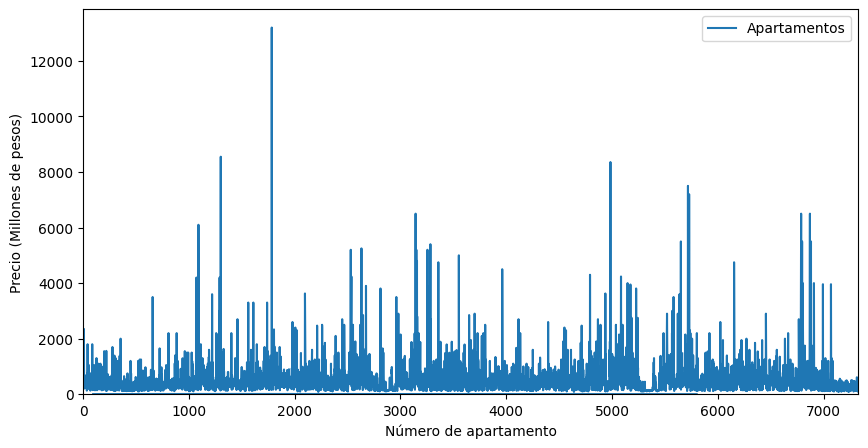

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.xlim((50,1000))

graficaLocal = sns.histplot(data=inmuebles[inmuebles['Tipo'] == 'Local'], x='Precio_Millon', kde=True)


datos_apts = inmuebles[inmuebles['Tipo'] == 'Apartamento']['Precio_Millon']
plt.plot(datos_apts, linestyle='-', label='Apartamentos')
plt.xlim((0, len(datos_apts)))
plt.ylabel('Precio (Millones de pesos)')
plt.xlabel('Número de apartamento')
plt.legend()
plt.show()

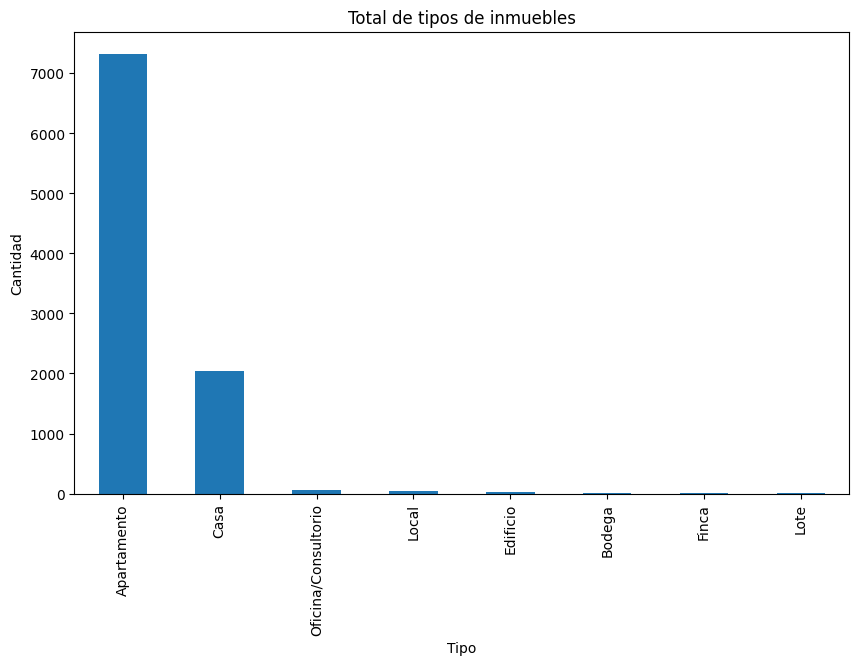

In [88]:

# Contar los valores de la columna "Tipo"
tipos_count = inmuebles['Tipo'].value_counts()

# Crear la gráfica de barras
tipos_count.plot(kind='bar', figsize=(10,6))

# Configurar la gráfica
plt.title('Total de tipos de inmuebles')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()


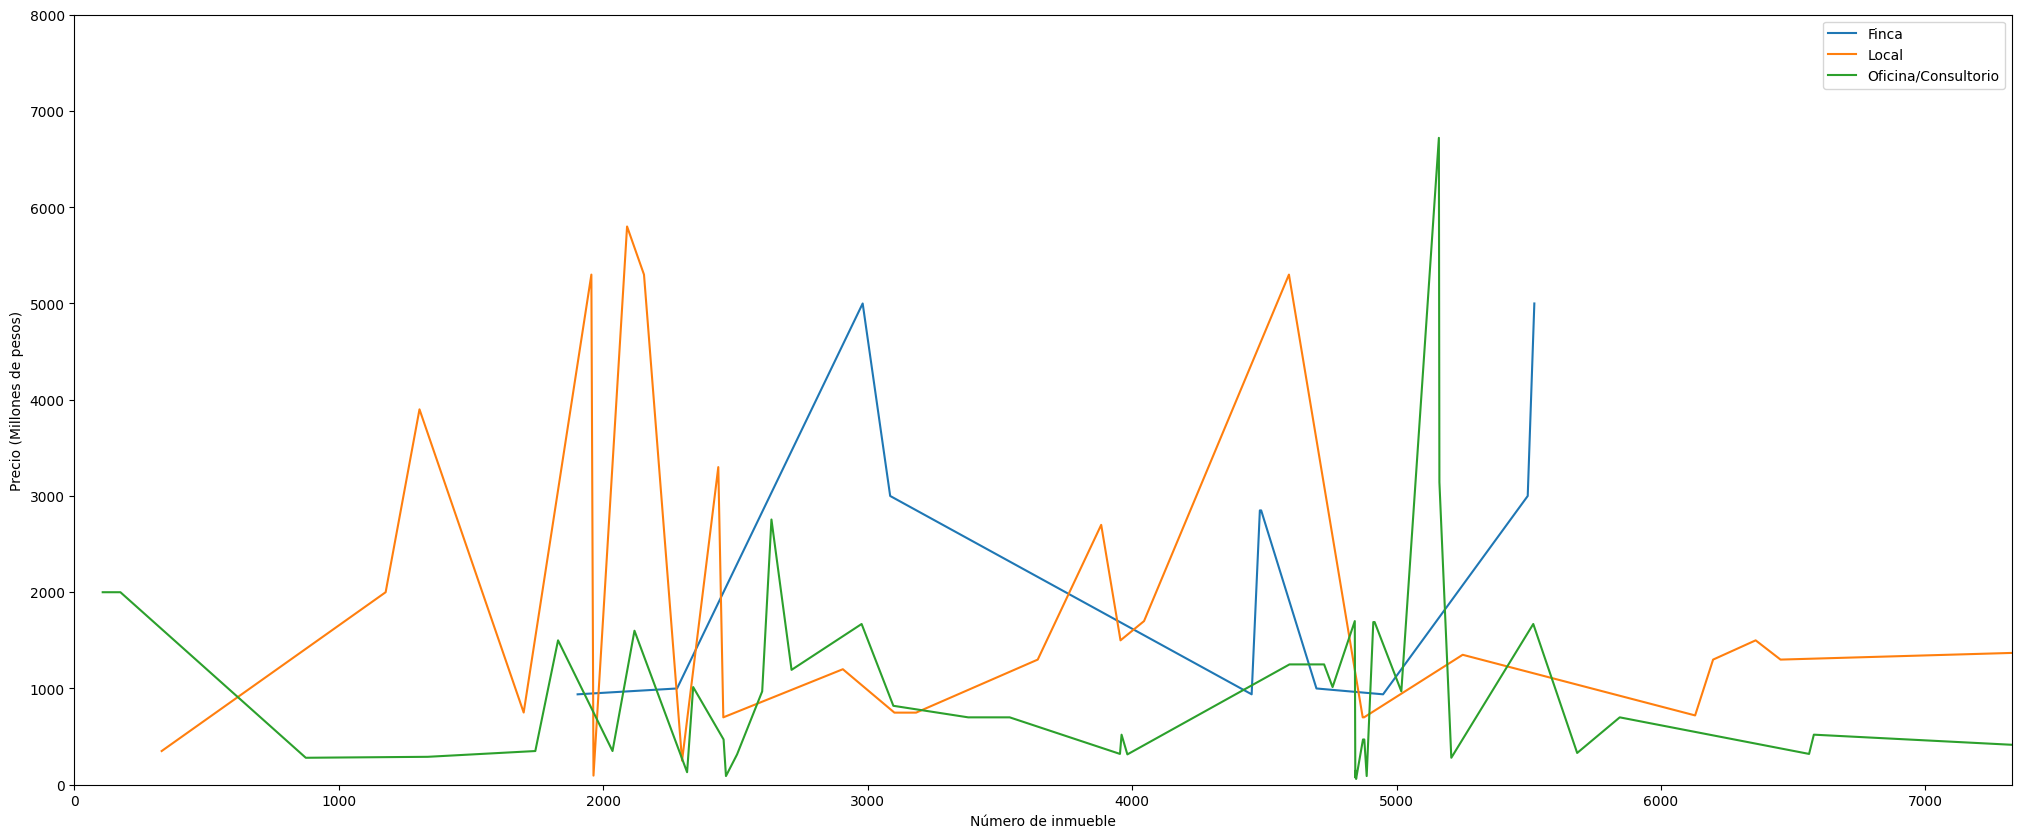

In [89]:

tipos = ['Oficina/Consultorio', 'Finca', 'Local']

inmuebles_filtrados = inmuebles[inmuebles['Tipo'].isin(tipos)]
grupos = inmuebles_filtrados.groupby('Tipo')
plt.figure(figsize=(25,10))

for tipo, grupo in grupos:
    datos = grupo['Precio_Millon']
    plt.plot(datos, linestyle='-', label=tipo)

plt.ylim((0, 8000))
plt.xlim((0, len(datos_apts)))
plt.ylabel('Precio (Millones de pesos)')
plt.xlabel('Número de inmueble')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()


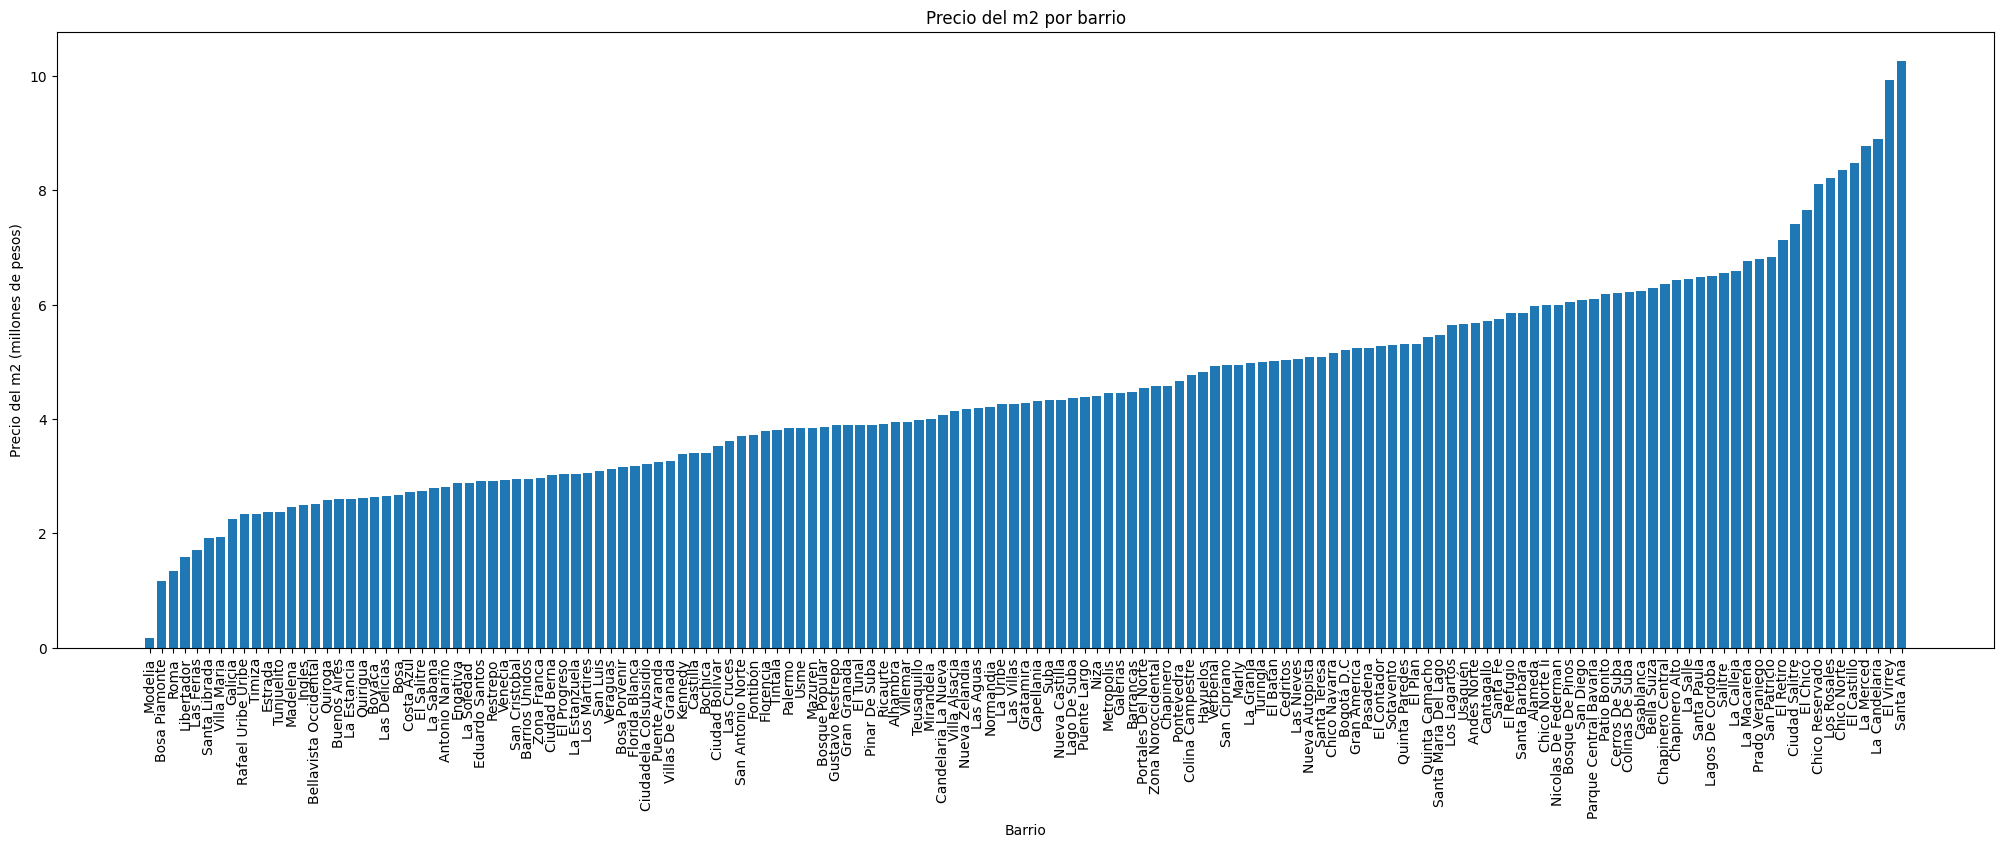

In [90]:


# Agrupar los datos por barrio y calcular el precio del m2 promedio
precios_m2 = inmuebles.groupby('Barrio')['Precio_Millon'].mean() / inmuebles.groupby('Barrio')['Area'].mean()

# Ordenar los precios del m2 de menor a mayor
precios_m2 = precios_m2.sort_values()

# Hacer el gráfico de barras
plt.figure(figsize=(25,8))

plt.bar(precios_m2.index, precios_m2.values)
plt.xticks(rotation=90)
plt.xlabel('Barrio')
plt.ylabel('Precio del m2 (millones de pesos)')
plt.title('Precio del m2 por barrio')
plt.show()


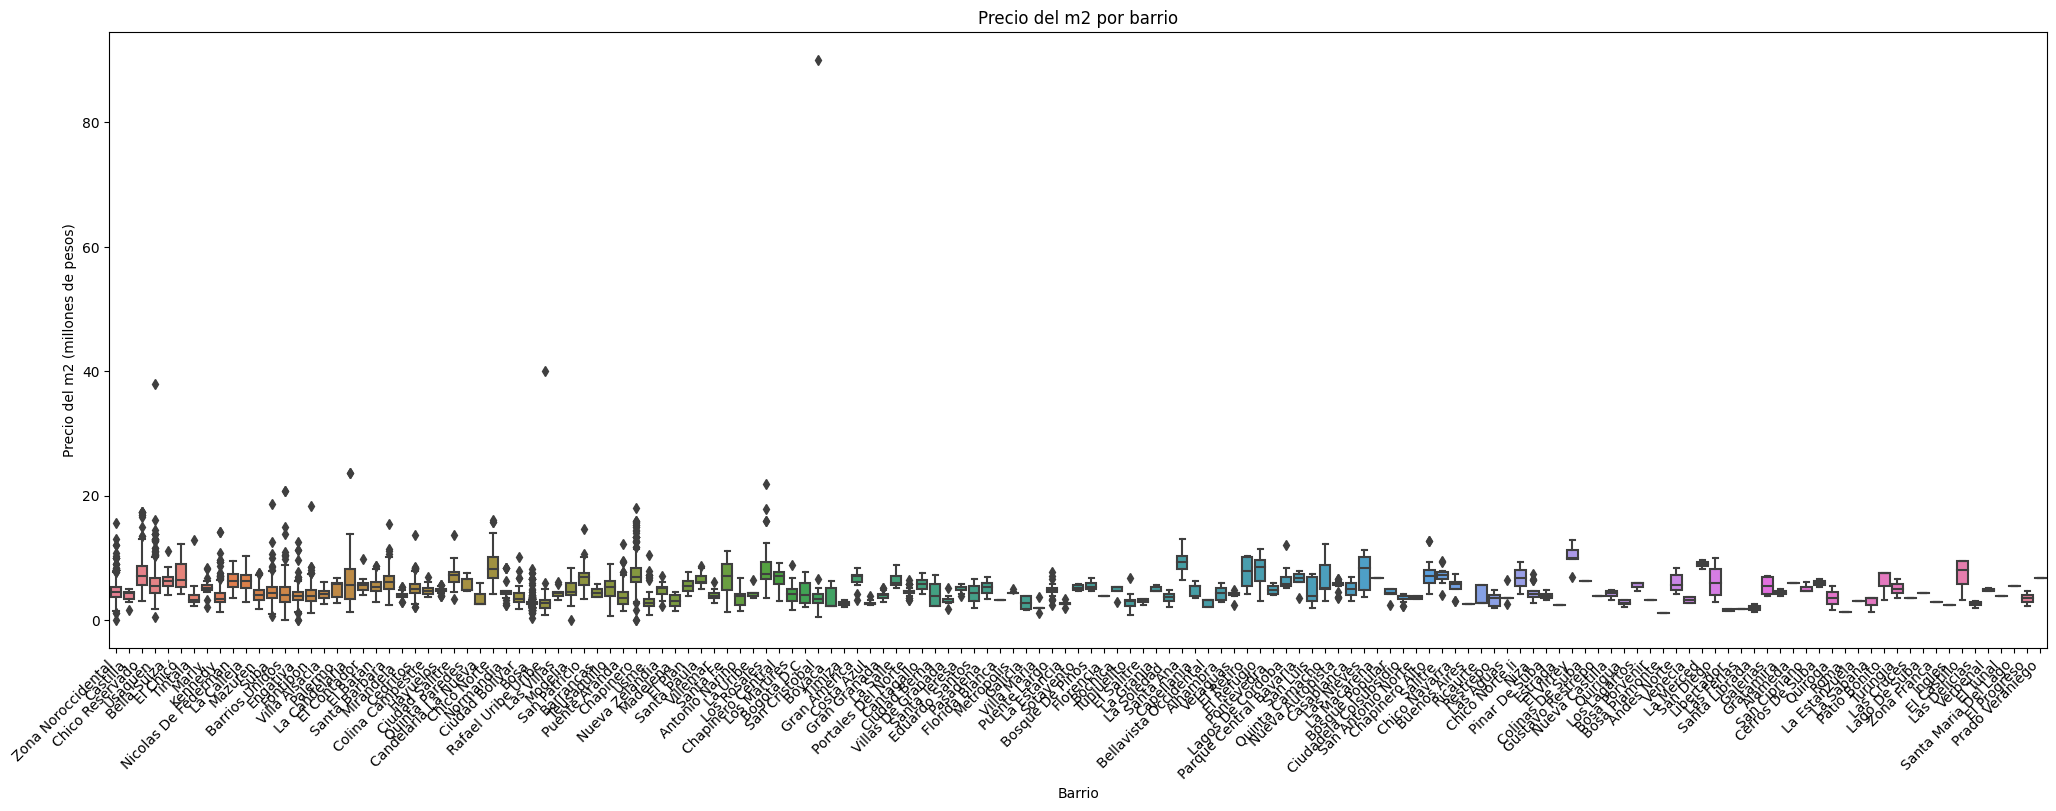

In [91]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el precio del m2 y agregarlo como una columna nueva
inmuebles['Precio_m2'] = inmuebles['Precio_Millon'] / inmuebles['Area']

# Agrupar por barrio y calcular la mediana del precio del m2 para cada barrio
precios_por_barrio = inmuebles.groupby('Barrio')['Precio_m2'].median()

# Generar una paleta de colores aleatorios para cada barrio
colores = sns.color_palette('husl', len(precios_por_barrio))

# Crear el gráfico
plt.figure(figsize=(25,8))
sns.boxplot(x='Barrio', y='Precio_m2', data=inmuebles, palette=colores)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Barrio')
plt.ylabel('Precio del m2 (millones de pesos)')
plt.title('Precio del m2 por barrio')
plt.show()

